IMPORTING LIBRARIES

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import csv
import numpy as np

DATA FRAME CREATION

In [20]:
dataset={'car weight(ibs)':[1500,1800,2000,2500,3000],
        'MPG':[30,28,25,20,18]}
df=pd.DataFrame(dataset)
df

,car weight(ibs),MPG
0,1500,30
1,1800,28
2,2000,25
3,2500,20
4,3000,18


INITIALIZING WEIGHT AND BIAS VALUES

In [21]:
np.random.seed(42)
weight=np.random.rand()
bias=np.random.rand()

print(f'the initial weight value is {weight} and the initial bias value is {bias}')

the initial weight value is 0.3745401188473625 and the initial bias value is 0.9507143064099162


In [22]:
prediction=(weight*1500)+bias
prediction

562.7608925774537

LOSS AND GRADIENT

In [48]:
def compute_loss(weight,bias,features,actual_value,learning_rate=0.0001):
    prediction=(weight*features)+bias
    return np.mean((prediction-actual_value)**2)

In [49]:
x=df[['car weight(ibs)']].values
y=df['MPG'].values
n=len(x)

In [50]:
def gradient_descent(weight,bias,features,actual_value,learning_rate=0.0001):
    n=len(features)
    prediction=(weight*features)+bias
    loss=prediction-actual_value
    
    weight_gradient=(2/n)*np.sum(loss*features)
    bias_gradient=(2/n)*np.sum(loss)

    weight-=weight_gradient*learning_rate
    bias-=bias_gradient*learning_rate

    return weight,bias

    # print(f'the updated weight value is  {weight}') 
    # print(f' the updated bias value is   {bias}')
weight=np.random.rand()
bias=np.random.rand()
gradient_descent(weight,bias,x,y,0.0001)

(np.float64(-356.36071869905845), np.float64(0.44290792691735337))

In [51]:
np.random.seed(42)
weight=np.random.rand()
bias=np.random.rand()

learning_rate=0.0001
iterations=100
loss_history=[]

for f in range (iterations):
    weight,bias=gradient_descent(weight,bias,x,y)
    loss=compute_loss(weight,bias,x,y)
    loss_history.append(loss)

print(f'the loss of the model is {loss_history}')
print(weight,bias)

the loss of the model is [np.float64(16078616010767.525), np.float64(3.9348904861706355e+20), np.float64(9.62978600138046e+27), np.float64(2.3566800336196617e+35), np.float64(5.767460232309827e+42), np.float64(1.4114600648686813e+50), np.float64(3.454240574661462e+57), np.float64(8.453500204943907e+64), np.float64(2.0688097476242063e+72), np.float64(5.0629605111523534e+79), np.float64(1.2390491279792814e+87), np.float64(3.032302421013332e+94), np.float64(7.420898626900175e+101), np.float64(1.8161030393639217e+109), np.float64(4.4445159749670354e+116), np.float64(1.0876983201710722e+124), np.float64(2.6619043386647907e+131), np.float64(6.51443012901592e+138), np.float64(1.594264650664236e+146), np.float64(3.901614916455493e+153), np.float64(9.548351304136136e+160), np.float64(2.3367506681060297e+168), np.float64(5.718687458146464e+175), np.float64(1.399523992453515e+183), np.float64(3.425029641483269e+190), np.float64(8.382012818853944e+197), np.float64(2.0513147694980337e+205), np.floa

C:\Users\Student\AppData\Local\Temp\ipykernel_8360\1944549043.py:3: RuntimeWarning: overflow encountered in square
  return np.mean((prediction-actual_value)**2)
C:\Users\Student\AppData\Local\Temp\ipykernel_8360\1014956124.py:6: RuntimeWarning: overflow encountered in multiply
  weight_gradient=(2/n)*np.sum(loss*features)
C:\Users\Student\AppData\Local\Temp\ipykernel_8360\1014956124.py:9: RuntimeWarning: invalid value encountered in scalar subtract
  weight-=weight_gradient*learning_rate


MANUAL CALCULATION

In [55]:
np.random.seed(42)
weight=np.random.rand()
bias=np.random.rand()

learning_rate=0.0001

x=df[['car weight(ibs)']].values
y=df['MPG'].values
n=1

prediction=(weight*x[0])+bias
loss=prediction-y[0]

weight_gradient=(2/n)*np.sum(loss*x[0])
bias_gradient=(2/n)*np.sum(loss)

weight-=weight_gradient*learning_rate
bias-=bias_gradient*learning_rate

print(f'the loss calculated manually is : {loss}')

# return weight,bias


the loss calculated manually is : [532.76089258]


MODEL TRAINING

In [56]:
x=df[['car weight(ibs)']].values
y=df['MPG'].values
n=len('features')

model=LinearRegression()
model.fit(x,y)

predict=pd.DataFrame({'car weight(ibs)':[2500]})
new_MPG=model.predict(predict)[0]

print(f"Model Weight (Coefficient): {model.coef_[0]}")
print(f"Model Bias (Intercept): {model.intercept_}")

print(f'the predicted MPG is :{new_MPG}')

Model Weight (Coefficient): -0.008470254957507084
Model Bias (Intercept): 42.4957507082153
the predicted MPG is :21.32011331444759


C:\Users\Student\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


VISUALISATION

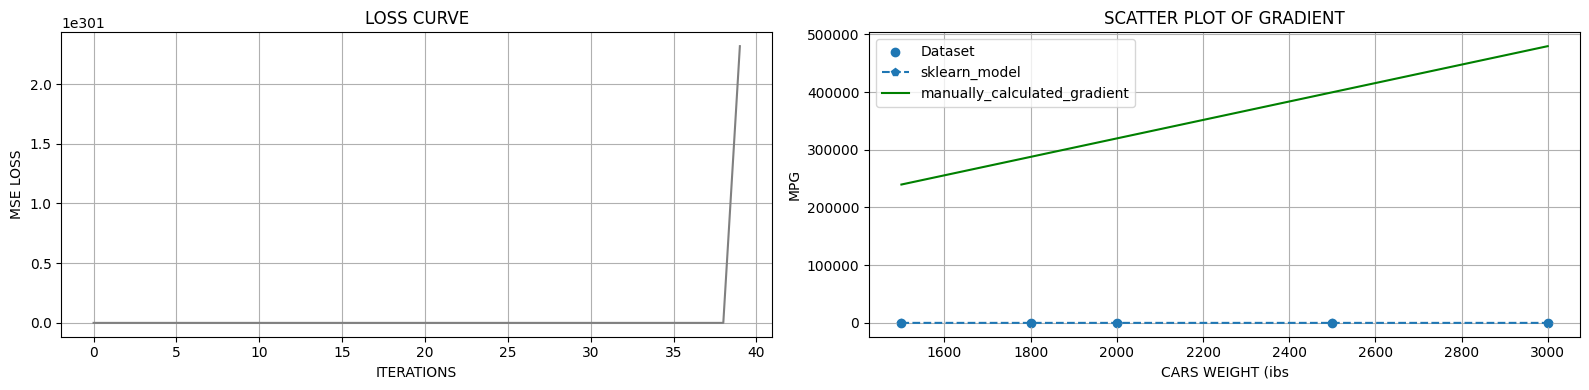

In [58]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(range(iterations),loss_history,color='gray',linestyle='-')
plt.title('LOSS CURVE')
plt.xlabel('ITERATIONS')
plt.ylabel('MSE LOSS')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(x,y,label='Dataset')
plt.plot(x,model.predict(x),marker='p',linestyle='--',label='sklearn_model')
plt.plot(x,weight*x+bias,color='green',linestyle='-',label='manually_calculated_gradient')
plt.title('SCATTER PLOT OF GRADIENT')
plt.xlabel('CARS WEIGHT (ibs')
plt.ylabel('MPG')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()